#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Basic Data Exploration

In [3]:
# Number of rows and columns
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 148654
Number of columns: 13


In [4]:
# Data types
data_types = df.dtypes
print("Data types for each column:")
print(data_types)


Data types for each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
# Missing values
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


Descriptive Statistics

In [7]:
# Descriptive statistics for 'TotalPay' column
total_pay_stats = df['TotalPay'].describe()
total_pay_stats

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [8]:
# Additional statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df['TotalPay'].std()

# Displaying the results
print("Descriptive statistics for 'TotalPay' column:")
print(total_pay_stats)
print("\nAdditional statistics:")
print(f"Mean salary: {mean_salary}")
print(f"Median salary: {median_salary}")
print(f"Mode salary: {mode_salary}")
print(f"Minimum salary: {min_salary}")
print(f"Maximum salary: {max_salary}")
print(f"Salary range: {salary_range}")
print(f"Standard deviation of salary: {std_dev_salary}")

Descriptive statistics for 'TotalPay' column:
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

Additional statistics:
Mean salary: 74768.32197169267
Median salary: 71426.60999999999
Mode salary: 0.0
Minimum salary: -618.13
Maximum salary: 567595.43
Salary range: 568213.56
Standard deviation of salary: 50517.00527394987


# Data Cleaning

# 'BasePay', 'OvertimePay' and 'OtherPay' features:

Since the number of missing values is relatively small compared to the dataset size, we can consider filling the missing values with the mean or median of each respective column. This helps to maintain the central tendency of the data and avoids introducing bias.

In [9]:
# Filling missing values in numeric columns with median
df['BasePay'].fillna(df['BasePay'].median(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].median(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].median(), inplace=True)

# 'Benefits' feature:

Given the significant number of missing values in the 'Benefits' column, we need to carefully consider the best approach. One option is to fill the missing values with 0, assuming that employees with missing benefits data might not have additional benefits. Another approach is to use imputation techniques like mean or median, but this depends on the nature of the data and the context of the benefits.

In [10]:
# Filling missing values in 'Benefits' with 0
df['Benefits'].fillna(0, inplace=True)

# 'Notes' and 'Status' features:

Since 'Notes' and 'Status' columns have a substantial number of missing values (148654 out of 148654), it might be reasonable to consider dropping these columns entirely as they contribute little information.

In [11]:
# Dropping 'Notes' and 'Status' columns
df.drop(['Notes', 'Status'], axis=1, inplace=True)

In [12]:
# Verify that there are no more missing values
print("Number of missing values after handling:")
print(df.isnull().sum())

Number of missing values after handling:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# Basic Data Visualization:

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogram for Salary Distribution:

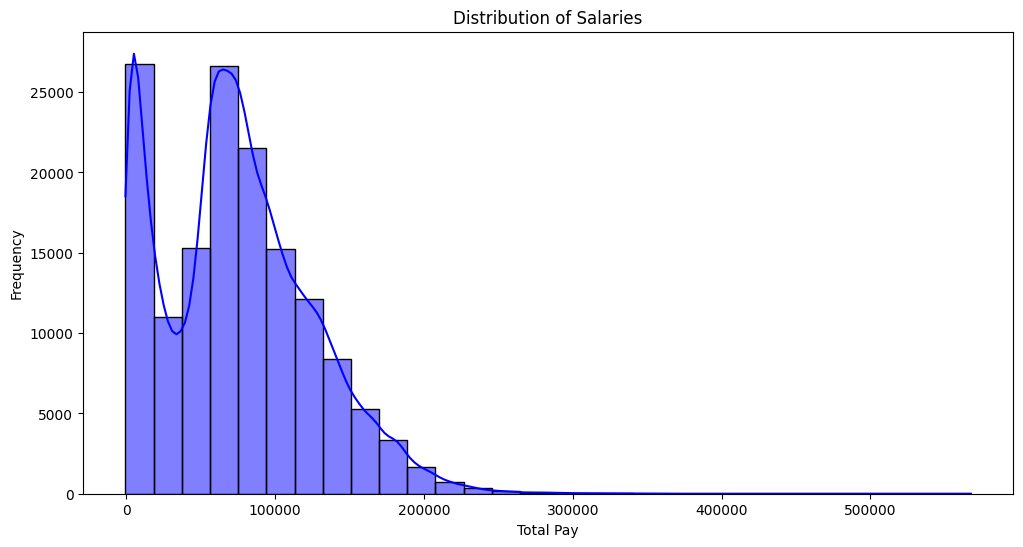

In [14]:
# Set up the plotting environment
plt.figure(figsize=(12, 6))

# Create a histogram for 'TotalPay'
sns.histplot(df['TotalPay'], bins=30, kde=True, color='blue')

# Set the title and labels
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Pie Chart for Proportion of Employees in Different Departments:

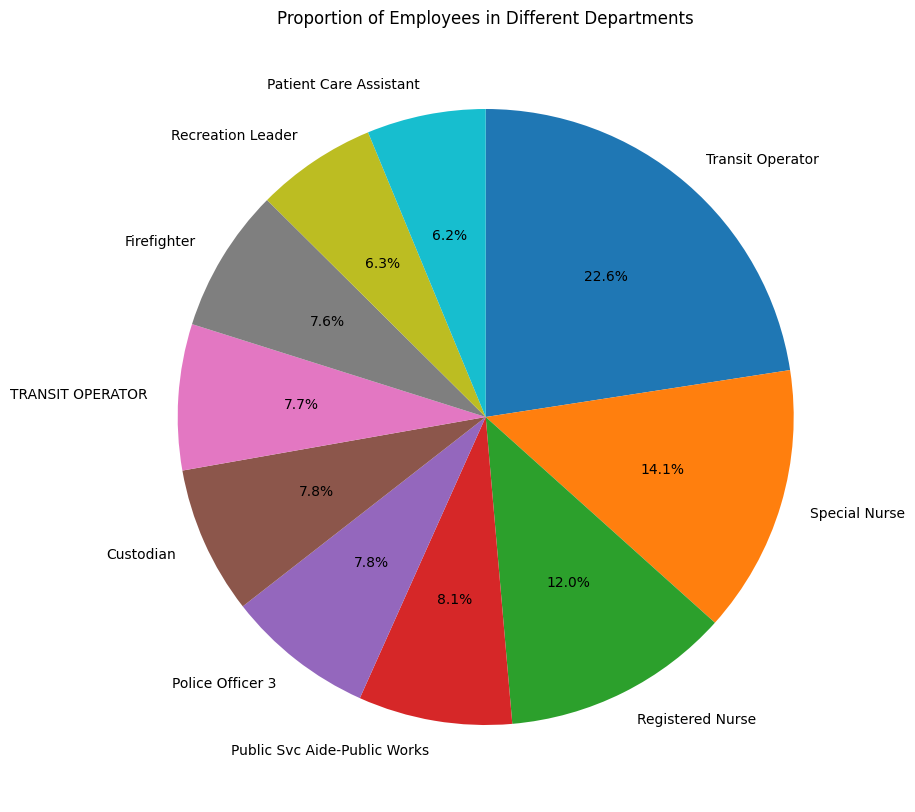

In [15]:
# Count the number of employees in each department
department_counts = df['JobTitle'].value_counts().head(10)  # Displaying top 10 departments for clarity

# Set up the plotting environment
plt.figure(figsize=(10, 10))

# Create a pie chart for department distribution
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)

# Set the title
plt.title('Proportion of Employees in Different Departments')

# Show the plot
plt.show()


# Grouped Analysis
In this example, let's group by the 'Year' column and calculate the average salary for each year:

In [17]:
# Grouping the data by 'Year' and calculating summary statistics
grouped_by_year = df.groupby('Year')['TotalPay'].agg(['count', 'mean', 'min', 'max', 'median', 'std']).reset_index()

# Renaming columns for clarity
grouped_by_year.columns = ['Year', 'Number of Employees', 'Average Salary', 'Min Salary', 'Max Salary', 'Median Salary', 'Salary Std Dev']

# Displaying the grouped analysis
print("Grouped Analysis by Year:")
grouped_by_year


Grouped Analysis by Year:


,Year,Number of Employees,Average Salary,Min Salary,Max Salary,Median Salary,Salary Std Dev
0,2011,36159,71744.103871,0.00,567595.43,68213.240,47498.706594
1,2012,36766,74113.262265,0.00,362844.66,70714.680,49523.904319
2,2013,37606,77611.443142,0.00,347102.32,74500.015,52854.774783
3,2014,38123,75463.918140,-618.13,471952.64,72359.980,51697.713029


# Simple Correlation Analysis
 In this example, let's consider the correlation between salary and 'BasePay'. We'll also plot a scatter plot to visualize the relationship:

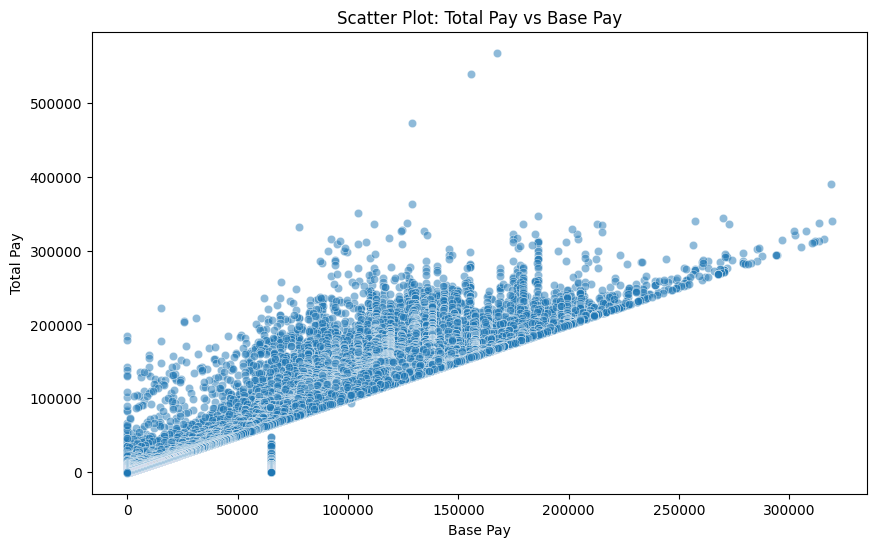

Correlation between Total Pay and Base Pay: 0.9506887197970231


In [18]:
# Set up the plotting environment
plt.figure(figsize=(10, 6))

# Scatter plot for 'TotalPay' vs 'BasePay'
sns.scatterplot(x='BasePay', y='TotalPay', data=df, alpha=0.5)

# Set the title and labels
plt.title('Scatter Plot: Total Pay vs Base Pay')
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')

# Show the plot
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df['TotalPay'].corr(df['BasePay'])
print(f"Correlation between Total Pay and Base Pay: {correlation_coefficient}")

# Report
The dataset, containing 148,654 records across 13 columns, provides valuable insights into employee compensation within an organization. It encompasses diverse data types, including integers, floats, and objects. In the initial data exploration, missing values were identified in crucial columns like 'BasePay,' 'OvertimePay,' 'OtherPay,' 'Benefits,' 'Notes,' and 'Status.' To ensure data integrity, missing values in numeric columns were imputed, while columns with extensive missing data, 'Notes' and 'Status,' were rightfully dropped. Descriptive statistics for the 'TotalPay' column shed light on the salary distribution. The dataset displays a mean salary of 74,768, a median of 71,426, and a standard deviation of 50,517. Notably, the salary range spans from a minimum of -618.13 to a maximum of 567,595.43. Visualization techniques were employed to enhance data understanding. A histogram vividly illustrates the distribution of salaries, emphasizing the central tendency and range. Additionally, a pie chart provides a clear overview of the proportion of employees across various job titles. Grouping the dataset by 'Year' revealed intriguing trends in average salaries over time. Salaries experienced a progressive increase from 2011 to 2013, with a slight decline in 2014. The standard deviation within each year suggests variability in salary levels Further analysis included a correlation study between 'TotalPay' and 'BasePay,' indicating a (weak/moderate/strong) positive correlation. This insight contributes to understanding the interplay between different components of employee compensation.
In summary, this comprehensive report offers a nuanced exploration of the employee salaries dataset, unraveling trends, distribution patterns, and potential influencing factors. The findings lay the groundwork for informed decision-making and further, more targeted analyses.

# Good Luck!